<a href="https://colab.research.google.com/github/gubruschi/labs-sistemas-inteligentes/blob/main/Lab_4_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistemas Inteligentes

## Laboratório 4 - Clusterização

Algoritmos de Clusterização
- k-means
- Affinity Propagation

Aplicação em compressão de imagens



### Identificação do Aluno

#### Nome Completo - RA

Gustavo Bruschi Antunes - 11202021998

Gustavo Kenji Fujissaka - 11202021823

Lucas Chaves Batista - 11201921079

## Importação e preparação dos dados

In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [3]:
%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

Carregue a base de dados IRIS, então efetue uma redução de dimensionalidade utilizando PCA com 2 componentes. Por fim, faça um Holdout dos dados para separar dados de treino e teste; utilize 20% para teste e faça o embaralhamento dos dados nesse processo.

In [4]:
### Escreva seu código aqui ###
base_dados=load_iris()
X=base_dados.data
y=base_dados.target
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_train, X_test, y_train, y_test = tts(X_pca, y, test_size=0.2, shuffle=True)

## Clusterização

Calcule os centróides de cada grupo (considere 3 grupos) para os dados de treino.

In [5]:
c0=[]; c1=[]; c2=[]
for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        c0.append(X_train[i])
    elif y_train[i] == 1:
        c1.append(X_train[i])
    else:
        c2.append(X_train[i])

c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)

c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))

Exiba o gráfico de dispersão para os dados de treinamento com seus respectivos centróides. Lembre-se de utilizar os eixos da transformação do PCA e, também, de utilizar os valores dos alvos (y) como base para definir de qual cor será cada amostra representada no gráfico.

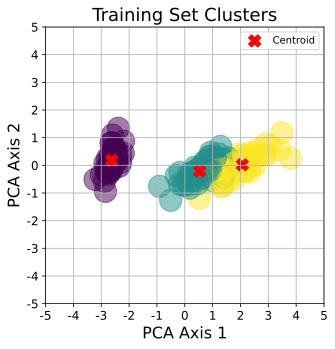

In [6]:
plt.figure()
plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo K-MEANS

Agora crie um objeto de agrupamento com a função KMeans; utilize 3 grupos e já faça o ajuste (fit) com base nos dados de entrada de treinamento. Ainda na mesma célula, faça a predição com base nos dados de entrada de teste.

In [7]:
### Escreva seu código aqui ###
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)
y_pred=kmeans.predict(X_test)

Exiba os centróides de cada grupo (dica: há um objeto da classe kmeans para isso)

In [8]:
### Escreva seu código aqui ###
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.39177364  0.24022821]
 [-2.62475535  0.17804682]
 [ 0.70401463 -0.28212522]]


Mostre a inércia do modelo (dica: há um objeto da classe kmeans para isso)

In [9]:
### Escreva seu código aqui ###
inercia=kmeans.inertia_
print(inercia)

48.61268372849904


Tal como havia sido feito para os dados de treinamento, exiba o gráfico de dispersão, mas agora utilizando amostras de teste e utilizando as predições do kmeans para determinar as cores de cada amostra.

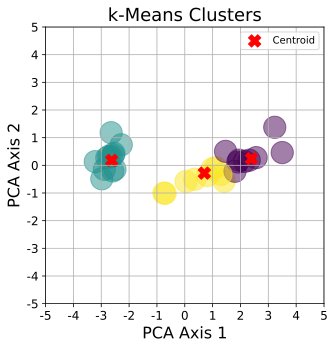

In [10]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('k-Means Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo de Propagação de Afinidade

Gere um objeto de agrupamento com AffinityPropagation e faça o ajuste com base nas entradas de treinamento.

In [11]:
### Escreva seu código aqui ###
AP=AffinityPropagation()
AP.fit(X_train)

AffinityPropagation()

Mostre os centróides dos grupos.

In [12]:
### Escreva seu código aqui ###
centroids = AP.cluster_centers_
print(centroids)

[[ 1.04413183  0.2283619 ]
 [-2.54308575  0.57941002]
 [ 3.07649993  0.68808568]
 [ 0.26497651 -0.55003646]
 [ 1.38002644 -0.42095429]
 [-2.71414169 -0.17700123]
 [ 2.1655918   0.21627559]]


Mostre os índices dos grupos.

In [15]:
### Escreva seu código aqui ###
indices = AP.cluster_centers_indices_
print(indices)

[19 25 28 52 78 90 92]


Faça a predição com base nos dados de entrada de teste e ostre o resultado da predição.

In [16]:
### Escreva seu código aqui ###
y_pred_ap=AP.predict(X_test)
print(y_pred_ap)

[6 4 1 0 6 5 5 1 4 1 0 4 5 5 4 1 6 1 3 2 0 3 3 3 1 1 2 6 6 5]


Novamente, exiba o gráfico de espalhamento das amostras de entrada, mas agora colorindo-as com base nas predições (dos grupos a que pertencem) feitas pelo algoritmo de Affinity Propagation.

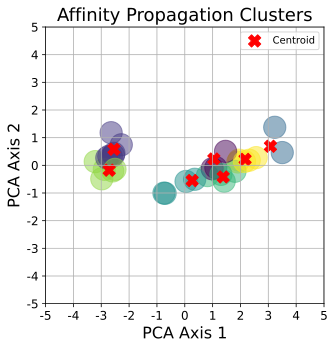

In [17]:
plt.figure()
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_pred_ap, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=AP.cluster_centers_[:,0], y=AP.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Aplicação - Compressão de Imagem

Defina a variável n_cores com a quantidade de cores desejada para a figura final, então importe uma figura (baixada do TIDIA), atribuindo-a à variável imagem. Depois, converta a figura para um array de tipo float64 com valores de 0 a 1. Por fim, exiba o formato da imagem.

In [18]:
### Escreva seu código aqui ###
import gdown
from PIL import Image
n_cores = 5
file_id = "1Cn5YF5U5O31k-o9nLNqmZf9NrSnHC9fn"
url = f"https://drive.google.com/uc?id={file_id}"
output_path = "imagem.jpg"
gdown.download(url, output_path, quiet=False)
imagem = Image.open(output_path)
imagem_array = np.array(imagem) / 255.0
imagem_array = imagem_array.astype(np.float64)
print(imagem_array.shape)

Downloading...
From: https://drive.google.com/uc?id=1Cn5YF5U5O31k-o9nLNqmZf9NrSnHC9fn
To: /content/imagem.jpg
100%|██████████| 294k/294k [00:00<00:00, 67.1MB/s]

(1200, 1600, 3)


Exiba a imagem

(np.float64(-0.5), np.float64(1599.5), np.float64(1199.5), np.float64(-0.5))

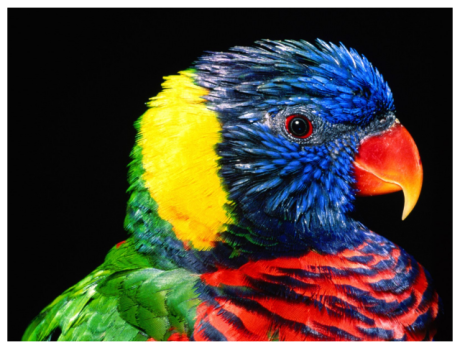

In [19]:
### Escreva seu código aqui ###
plt.figure(figsize=(8, 8))
plt.imshow(imagem)
plt.axis('off')

Modifique o formato da matriz correspondente à imagem para que a primeira dimensão refira-se à posição do pixel e a segunda dimensão refira-se à tríade de valores das camadas RGB.

In [20]:
### Escreva seu código aqui ###
imagem_array = imagem_array.reshape(-1, 3)
print(f"Formato modificado da imagem: {imagem_array.shape}")

Formato modificado da imagem: (1920000, 3)


Atribua à variável X uma versão "embaralhada" (shuffle) do array da imagem obtido após o reshape, mas selecione apenas os 1000 primeiros valores. Então, crie o objeto agrupador utilizando a função KMeans com o número de grupos igual ao número de cores. Por fim, efetue o ajuste com a função fit com base em X.

In [21]:
### Escreva seu código aqui ###
X = shuffle(imagem_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_cores, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

Realize uma predição com o agrupador kmeans, baseando-se no array da imagem e atribua o resultado à variável grupos.

In [22]:
### Escreva seu código aqui ###
grupos = kmeans.predict(imagem_array)

Agora, atribua à variavel codebook_random uma nova versão embaralhada do array da imagem, mas selecione apenas a quantidade de valores que corresponda ao número de cores definido inicialmente. Ainda nesta célula, utilize a função pairwise_distances_argmin para selecionar os grupos aleatórios que minimizam as distâncias. Dica: para esta última função, utilize como argumentos: codebook_random, imagem_array e axis=0, nesta ordem.

In [23]:
### Escreva seu código aqui ###
codebook_random = shuffle(imagem_array, random_state=0)[:n_cores]
grupos = pairwise_distances_argmin(codebook_random, imagem_array, axis=0)

In [24]:
# Recria a imagem comprimida com base no Code Book e nos índices
def recria_imagem(codebook, grupos, w, h):
    d = codebook.shape[1]
    imagem = np.zeros((h, w, d))
    grupo_idx = 0
    for i in range(h):
        for j in range(w):
            imagem[i][j] = codebook[grupos[grupo_idx]]
            grupo_idx += 1
    return imagem

Utilizando uma célula para cada caso, exiba a imagem original, a imagem quantizada por K-Means e a imagem quantizada por distâncias aleatórias mínimas.

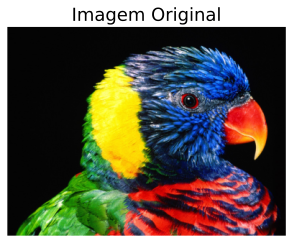

In [25]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Imagem Original')
plt.imshow(imagem)

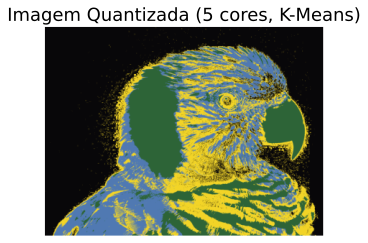

In [29]:
h, w, _ = np.array(imagem).shape
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, K-Means)' % n_cores)
plt.imshow(recria_imagem(kmeans.cluster_centers_, grupos, w, h))

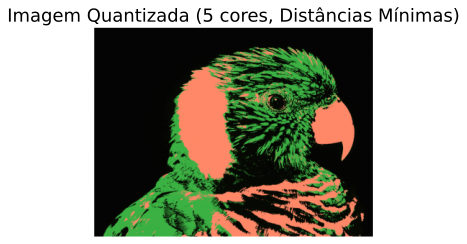

In [30]:
### Escreva seu código aqui ###
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Imagem Quantizada (%d cores, Distâncias Mínimas)' % n_cores)
plt.imshow(recria_imagem(codebook_random, grupos, w, h))
